# Figure 4

Plots for Devils each of the following simulations

- No intervention
- Vaccination
- Culling
- Natural Immunity

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../GillesPy2')))

In [2]:
import numpy as np
import pickle

In [3]:
from gillespy2 import TauHybridCSolver

In [4]:
from dask.distributed import Client
from dask import delayed

In [5]:
sys.path.insert(2, os.path.abspath(os.path.join(os.getcwd(), './ParameterSweeps')))
from Devils_DFTD_2_Stage_Infection import DevilsDFTD2StageInfection
from Simulation import Simulation, devil_pop
from ParameterSweep import ParameterSweep

In [6]:
c = Client(n_workers=8, threads_per_worker=1)
# c = Client("james.cs.unca.edu:12345")

## Load Simulation data and Paramter Sweeps

In [7]:
base_path = "./ParameterSweeps"

with open(os.path.join(base_path, "DevilsDFTD2StageInfectionWithVaccinationState.p"), "rb") as vsf:
    vacc_job = ParameterSweep.load_state(pickle.load(vsf)['job'])
    
with open(os.path.join(base_path, "DevilsDFTD2StageInfectionWithCullingState.p"), "rb") as csf:
    cull_job = ParameterSweep.load_state(pickle.load(csf)['job'])
    
with open(os.path.join(base_path, "DevilsDFTD2StageInfectionWithImmunityState.p"), "rb") as isf:
    immun_job = ParameterSweep.load_state(pickle.load(isf)['job'])

## Run Simulation for No Interventions

In [8]:
model = DevilsDFTD2StageInfection(devil_pop)
model.timespan(np.arange(0, 1001, 1))

In [9]:
sim = Simulation(model)

In [10]:
sol = delayed(TauHybridCSolver)(model=model, variable=True)

In [11]:
sim.configure(solver=sol)
%time _ = sim.run(use_existing_results=True)

3397.0
3631.0
3468.0
3662.0
3544.0
3431.0
3415.0
3497.0
3539.0
3589.0
3591.0
3392.0
3458.0
3526.0
3523.0
3505.0
3513.0
3316.0
3620.0
3407.0
3464.0
3576.0
3549.0
3357.0
3539.0
3626.0
3670.0
3656.0
3586.0
3567.0
3482.0
3498.0
3493.0
3546.0
3600.0
3488.0
3670.0
3590.0
3568.0
3585.0
3417.0
3585.0
3342.0
3570.0
3490.0
3620.0
3610.0
3622.0
3544.0
3551.0
3589.0
3588.0
3696.0
3501.0
3555.0
3510.0
3651.0
3616.0
3442.0
3552.0
3569.0
3554.0
3453.0
3600.0
3504.0
3621.0
3547.0
3607.0
3514.0
3513.0
3544.0
3643.0
3556.0
3576.0
3265.0
3520.0
3526.0
3552.0
3578.0
3598.0
3301.0
3513.0
3740.0
3517.0
3561.0
3528.0
3602.0
3364.0
3650.0
3404.0
3563.0
3594.0
3644.0
3578.0
3506.0
3640.0
3349.0
3498.0
3615.0
3664.0
CPU times: user 1.2 s, sys: 323 ms, total: 1.53 s
Wall time: 22.3 s


## Plots for Figure 4

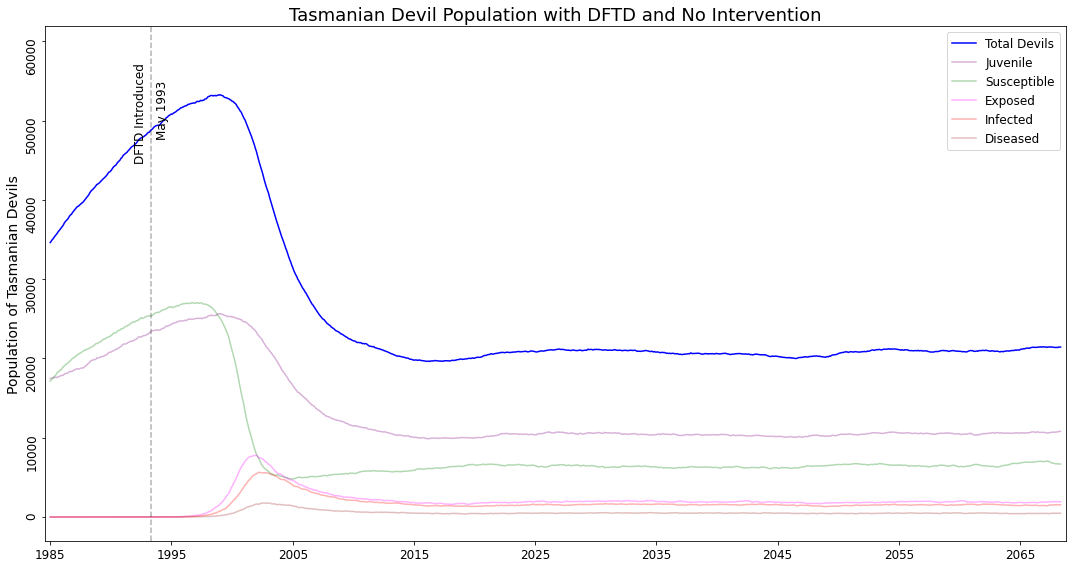

In [12]:
sim.plot()

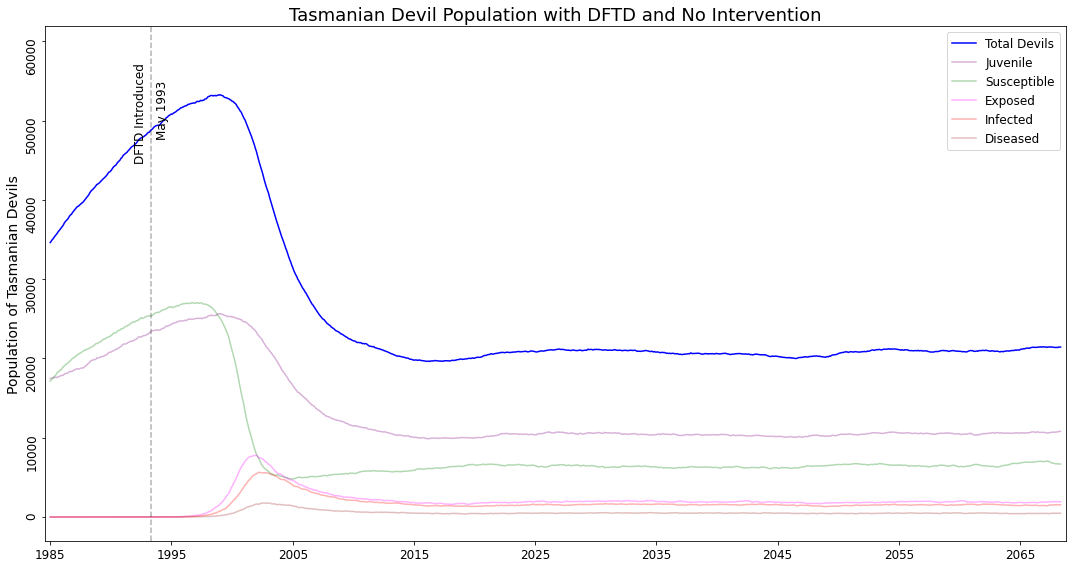

In [13]:
sim.plot(save_fig="figures/DFTDmodel_sec4_no_intervention.pdf")

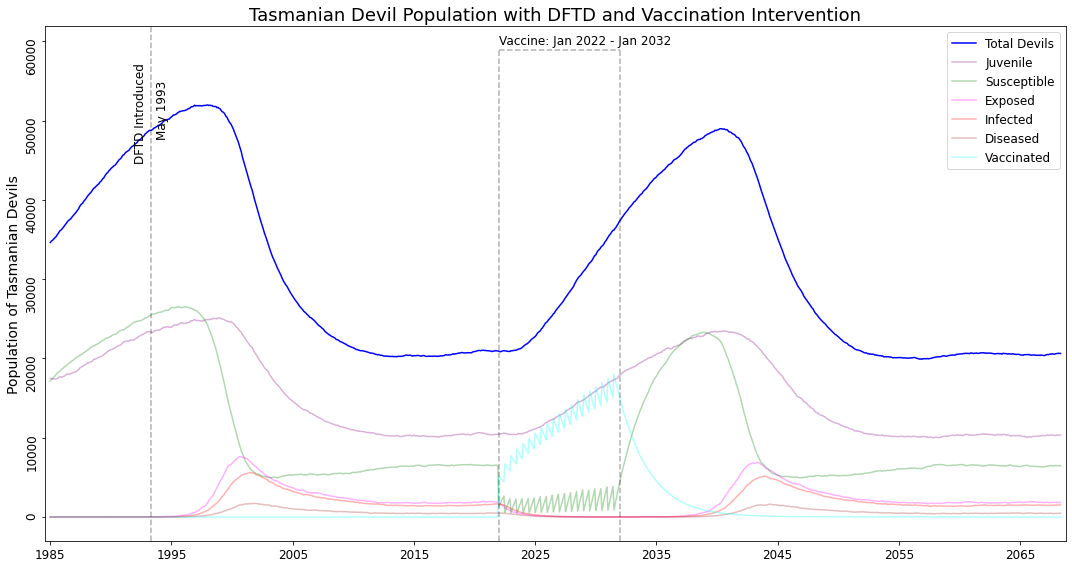

In [14]:
vacc_key = "vaccinated_infection_rate:0.6,vaccination_proportion:0.8,vacc_program_length:10,vaccine_frequency:2"
vacc_job.results[vacc_key].plot()

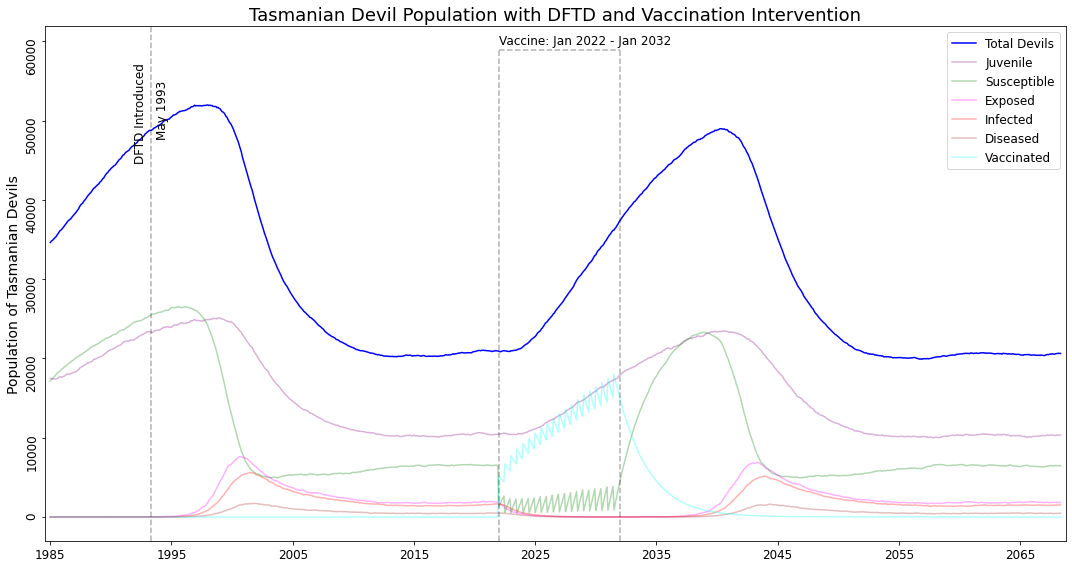

In [15]:
vacc_job.results[vacc_key].plot(save_fig="figures/DFTDmodel_sec4_vaccination.pdf")

0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0


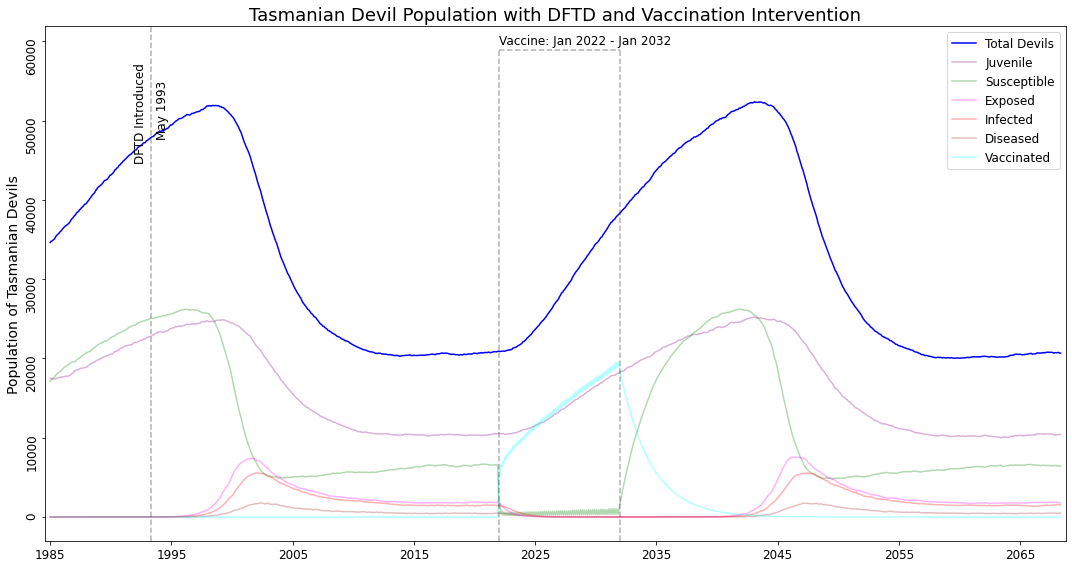

In [16]:
vacc_key = "vaccinated_infection_rate:0.6,vaccination_proportion:0.8,vacc_program_length:10,vaccine_frequency:6"
vacc_sim = vacc_job.results[vacc_key]
vacc_sim.run(use_existing_results=False, success=True)
vacc_sim.plot()

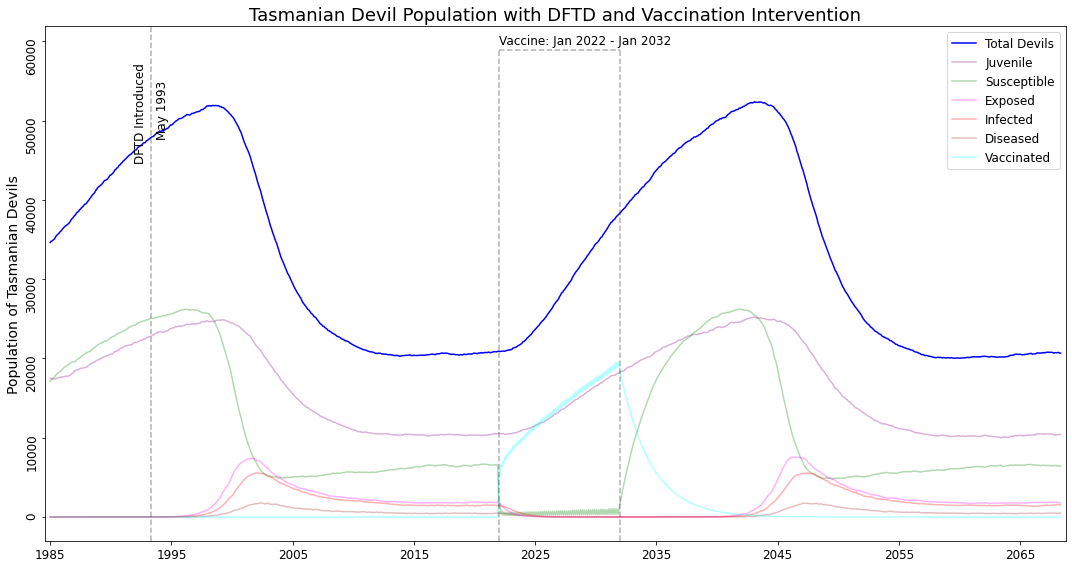

In [17]:
vacc_sim.plot(save_fig="figures/DFTDmodel_sec4_vaccination-successful.pdf")

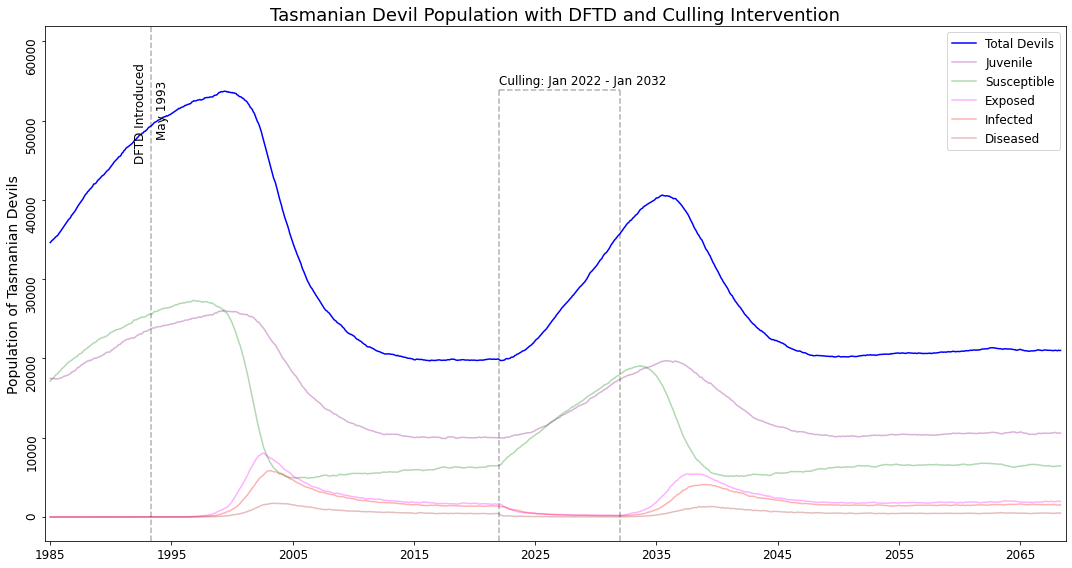

In [18]:
cull_key = "cull_rate_diseased:0.5,cull_program_length:10"
cull_job.results[cull_key].plot()

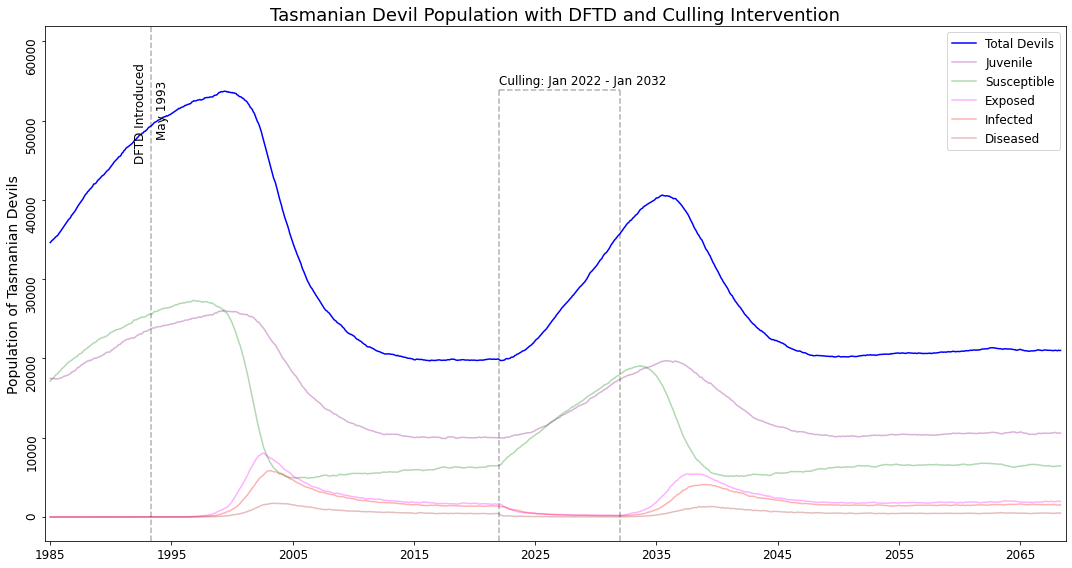

In [19]:
cull_job.results[cull_key].plot(save_fig="figures/DFTDmodel_sec4_culling.pdf")

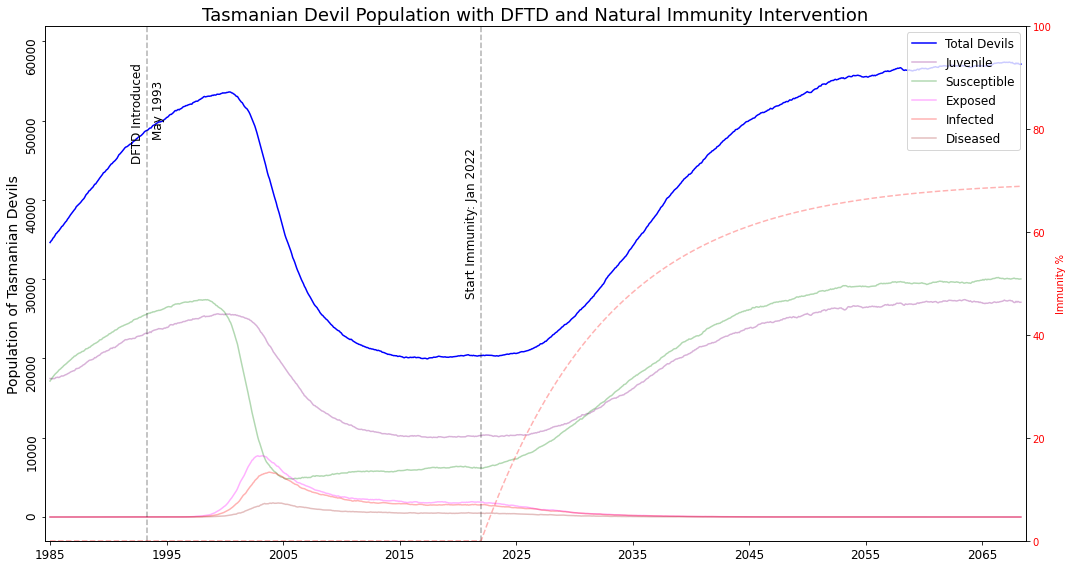

In [20]:
immun_key = "immunity_growth_rate:0.0075,immunity_max_level:70,immunity_start:444"
immun_job.results[immun_key].plot()

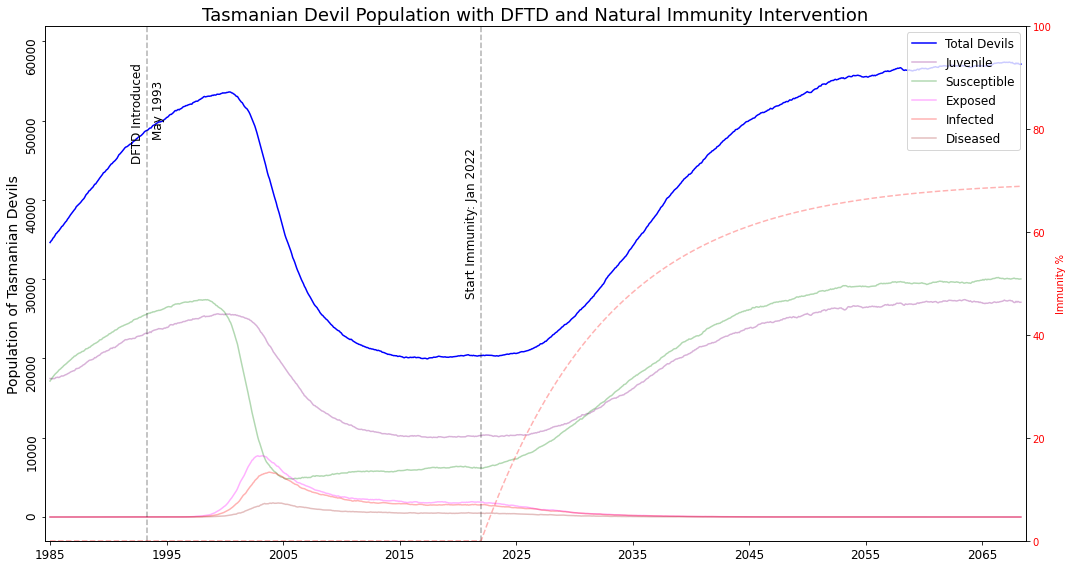

In [21]:
immun_job.results[immun_key].plot(save_fig="figures/DFTDmodel_sec4_immunity.pdf")